In [1]:
import numpy as np
import csv
import pandas as pd
import random
from math import sqrt, pi, exp
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start= -10
stop= 10
step = .001
nSteps= (stop-start)/step
x= np.linspace(start, stop, nSteps)

C:\Users\edwardsd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [3]:
q= pd.DataFrame({'theta':x})
q.reset_index(inplace=True)
q.head()

,index,theta
0,0,-10.000
1,1,-9.999
2,2,-9.998
3,3,-9.997
4,4,-9.996


In [4]:
len(x), nSteps

(20000, 20000.0)

In [5]:
f= open('./interval.csv', 'w', newline='')
o= csv.writer(f)
o.writerow(('index','theta'))
for n,i in enumerate(x):
    o.writerow((n,i))
f.close()

In [6]:
#frame= pd.read_csv('./interval.csv')
frame = q.copy()

In [7]:
frame.head(5)

,index,theta
0,0,-10.000
1,1,-9.999
2,2,-9.998
3,3,-9.997
4,4,-9.996


In [8]:
def pdf(mu=0, sigma=1):
    s2= sigma*sigma
    return lambda x: 1/sqrt(2*pi*(s2)) * exp(-(x-mu)**2/(2*s2))

```
def plot(sigma, data=frame):
    d= data.copy()
    a= d.applymap(pdf(sigma))[['theta']].rename(columns={'theta': 'm'})
    plotData= a.join(d)
    plt.plot(plotData['theta'],plotData['m'])
    return plotData
```

In [9]:
m_mu,m_sigma= 0.5, 1.5
pdfM= pdf(m_mu,m_sigma)

w_mu,w_sigma= 0, 1
pdfW= pdf(w_mu,w_sigma)

```
m= frame.applymap(pdf(2))[['theta']].rename(columns={'theta': 'm'})
w= frame.applymap(pdf(1))[['theta']].rename(columns={'theta': 'w'})
```

In [10]:
frame['m']= frame.applymap(pdfM)[['theta']]
m= frame['m']

frame['w']= frame.applymap(pdfW)[['theta']]
w= frame['w']

In [11]:
print(frame['m'].sum()*step)
print(frame['w'].sum()*step)

0.999949999879
0.99995


In [12]:
m_total= frame['m'].sum()*step
m_wing= (1-m_total)/2

w_total= frame['w'].sum()*step
w_wing= (1-w_total)/2

In [13]:
print(frame['m'].sum()*step+2*m_wing)
print(frame['w'].sum()*step+2*w_wing)

1.0
1.0


In [14]:
print(w_wing+frame[frame['theta']>=w_mu]['w'].sum()*step)
print(w_wing+frame[frame['theta']<=w_mu]['w'].sum()*step)

0.5
0.5


In [15]:
print(w_wing+frame[frame['theta']>=m_mu]['m'].sum()*step)
print(w_wing+frame[frame['theta']<=m_mu]['m'].sum()*step)

0.499993350842
0.500006649037


In [16]:
print(w_wing+frame[frame['theta']<=-w_sigma]['w'].sum()*step)
print(w_wing+frame[frame['theta']>=w_sigma]['w'].sum()*step)

0.158660212852
0.158660212852


In [17]:
print(w_wing+frame[frame['theta']<=(-m_sigma+m_mu)]['m'].sum()*step)
print(w_wing+frame[frame['theta']>=(m_sigma+m_mu)]['m'].sum()*step)

0.15866425113
0.158656185724


In [18]:
frame.head(5)

,index,theta,m,w
0,0,-10.000,6.089814e-12,7.694599e-23
1,1,-9.999,6.118299e-12,7.771931e-23
2,2,-9.998,6.146915e-12,7.850032e-23
3,3,-9.997,6.175663e-12,7.928910e-23
4,4,-9.996,6.204541e-12,8.008573e-23


In [19]:
pdfW(w_sigma+w_mu)

0.24197072451914337

In [20]:
closest= abs(frame['theta']-w_sigma).idxmin()
frame.iloc[closest-1:closest+2]

,index,theta,m,w
10998,10998,0.99855,0.251670,0.242322
10999,10999,0.99955,0.251614,0.242080
11000,11000,1.00055,0.251558,0.241838


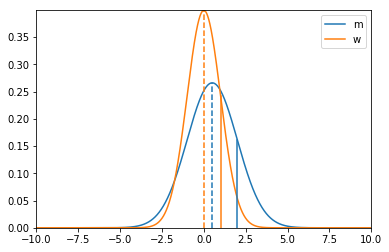

In [21]:
plt.plot(frame['theta'], frame['m'], '-')
plt.plot(frame['theta'], frame['w'], '-')

axis= [start,stop,0,max(frame['m'].max(),frame['w'].max())]

w_atMu= pdfW(w_mu)
m_atMu= pdfM(m_mu)

w_atSigma= pdfW(w_sigma+w_mu)
m_atSigma= pdfM(m_sigma+m_mu)

plt.axvline(x=w_mu, ymax=w_atMu/axis[3], color='C1', linestyle='dashed')
plt.axvline(x=m_mu, ymax=m_atMu/axis[3], color='C0', linestyle='dashed')

plt.axvline(x=(w_sigma+w_mu), ymax=w_atSigma/axis[3], color='C1')
plt.axvline(x=(m_sigma+m_mu), ymax=m_atSigma/axis[3], color='C0')

plt.axis(axis)
plt.legend()
plt.show()

In [22]:
print(frame[frame['theta']>=m_sigma]['m'].sum()*step+m_wing)
print(frame[frame['theta']>=w_sigma]['w'].sum()*step+w_wing)

0.252488936783
0.158660212852


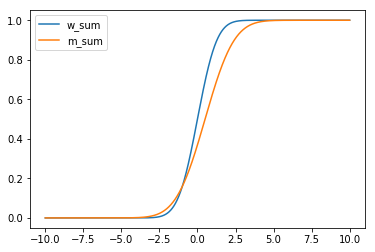

In [23]:
frame['m_sum']= frame['m'].cumsum()*step+m_wing
frame['w_sum']= frame['w'].cumsum()*step+w_wing

plt.plot(frame['theta'],frame['w_sum'])
plt.plot(frame['theta'],frame['m_sum'])
plt.legend()
plt.show()

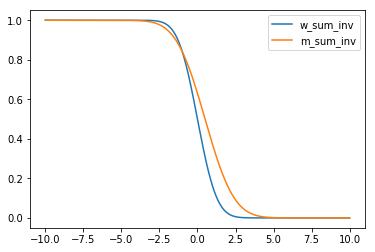

In [24]:
frame['m_sum_inv']= 1-frame['m_sum']
frame['w_sum_inv']= 1-frame['w_sum']

plt.plot(frame['theta'],frame['w_sum_inv'])
plt.plot(frame['theta'],frame['m_sum_inv'])
plt.legend()
plt.show()

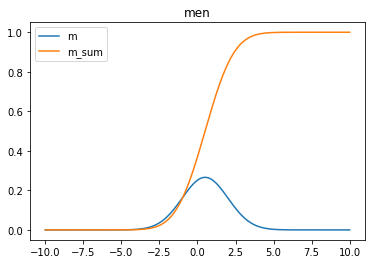

In [25]:
plt.plot(frame['theta'],frame['m'])
plt.plot(frame['theta'],frame['m_sum'])
plt.title("men")
plt.legend()
plt.show()

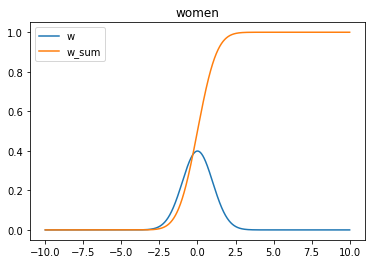

In [26]:
plt.plot(frame['theta'],frame['w'])
plt.plot(frame['theta'],frame['w_sum'])
plt.title("women")
plt.legend()
plt.show()

In [27]:
frame['all']= frame['w_sum']+frame['m_sum']
frame['w_part']= frame['w_sum']/frame['all']
frame['m_part']= frame['m_sum']/frame['all']

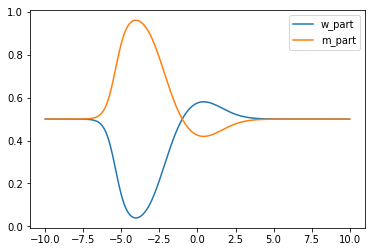

In [28]:
plt.plot(frame['theta'],frame['w_part'])
plt.plot(frame['theta'],frame['m_part'])
plt.legend()

In [29]:
frame['all_inv']= frame['w_sum_inv']+frame['m_sum_inv']
frame['w_part_inv']= frame['w_sum_inv']/frame['all_inv']
frame['m_part_inv']= frame['m_sum_inv']/frame['all_inv']

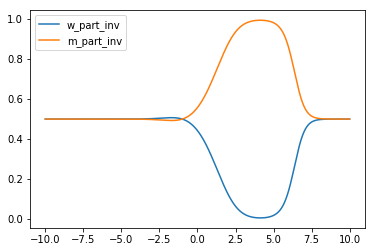

In [30]:
plt.plot(frame['theta'],frame['w_part_inv'])
plt.plot(frame['theta'],frame['m_part_inv'])
plt.legend()
plt.show()

In [31]:
frame.to_csv('../intervalAnalysis.csv')

In [32]:
def plot1():
########################
    plt.figure(1)
    plt.plot(frame['theta'], frame['m'], '-')
    plt.plot(frame['theta'], frame['w'], '-')

    axis= [start,stop,0,max(frame['m'].max(),frame['w'].max())]

    w_atMu= pdfW(w_mu)
    m_atMu= pdfM(m_mu)

    w_atSigma= pdfW(w_sigma+w_mu)
    m_atSigma= pdfM(m_sigma+m_mu)

    plt.axvline(x=w_mu, ymax=w_atMu/axis[3], color='C1', linestyle='dashed')
    plt.axvline(x=m_mu, ymax=m_atMu/axis[3], color='C0', linestyle='dashed')

    plt.axvline(x=(w_sigma+w_mu), ymax=w_atSigma/axis[3], color='C1')
    plt.axvline(x=(m_sigma+m_mu), ymax=m_atSigma/axis[3], color='C0')

    plt.axis(axis)
    plt.title("Distribution")
    plt.legend()
    plt.show()
    ########################
    pass

In [33]:
def plot2():
########################
    f, (ax1,ax2)= plt.subplots(2,1,sharex=True)
    frame['m_sum']= frame['m'].cumsum()*step+m_wing
    frame['w_sum']= frame['w'].cumsum()*step+w_wing

    ax1.plot(frame['theta'],frame['w_sum'])
    ax1.plot(frame['theta'],frame['m_sum'])
    plt.xticks([])
    ax1.legend()
    ax1.set_title('CDF')

    frame['m_sum_inv']= 1-frame['m_sum']
    frame['w_sum_inv']= 1-frame['w_sum']

    #plt.subplot(122)
    ax2.plot(frame['theta'],frame['w_sum_inv'])
    ax2.plot(frame['theta'],frame['m_sum_inv'])
    ax2.legend()
    ax2.set_title("Inverted-CDF")
    ########################

    plt.show()

In [34]:
def plot3():
########################
    plt.figure(3)
    plt.subplot(211)
    plt.plot(frame['theta'],frame['w'])
    plt.plot(frame['theta'],frame['m'])
    
    plt.title("Density")
    plt.xticks([])
    plt.legend()
    #plt.show()

    plt.subplot(212)
    
    plt.plot(frame['theta'],frame['w_sum'])
    plt.plot(frame['theta'],frame['m_sum'])
    plt.title("Distribution")
    plt.legend()
    plt.show()
    ########################

In [35]:
def plot4():
########################
    frame['all']= frame['w_sum']+frame['m_sum']
    frame['w_part']= frame['w_sum']/frame['all']
    frame['m_part']= frame['m_sum']/frame['all']

    plt.figure(4)
    #f, (ax1, ax2)= plt.subplots(2, sharey=True)
    plt.subplot(211)
    plt.plot(frame['theta'],frame['w_part'])
    plt.plot(frame['theta'],frame['m_part'])
    plt.xticks([])
    plt.title("Integrate from Left")
    plt.legend()
    #plt.show()
    ########################

    ########################
    frame['all_inv']= frame['w_sum_inv']+frame['m_sum_inv']
    frame['w_part_inv']= frame['w_sum_inv']/frame['all_inv']
    frame['m_part_inv']= frame['m_sum_inv']/frame['all_inv']

    #plt.figure(5)
    plt.subplot(212)
    plt.plot(frame['theta'],frame['w_part_inv'])
    plt.plot(frame['theta'],frame['m_part_inv'])
    plt.title("Integrate from Right")
    plt.legend()
    plt.show()
    ########################
    pass

In [36]:
def thetaIndex(theta=-7,step=.001):
    start= -abs(theta)
    stop= abs(theta)
    step = abs(step)
    nSteps= (stop-start)/step

    x= np.linspace(start, stop, nSteps)
    frame= pd.DataFrame({'theta':x})
    frame.reset_index(inplace=True)
    return frame

In [37]:
def plotSamples(results):
    plt.figure(1)
    f, (ax1, ax2)= plt.subplots(2, sharex= True)
    ax1.plot(results['dMu'],results['m_mu'])
    ax1.plot(results['dMu'],results['w_mu'])
    #ax1.ylabel('mu')
    #ax1.xlabel('dMu')
    #ax1.xticks([])
    ax1.legend()
    #plt.show()

    #plt.subplots(212)
    results.sort_values(by='dSigma', inplace=True)
    ax2.plot(results['dSigma'],results['m_sigma'])
    ax2.plot(results['dSigma'],results['w_sigma'])
    #ax2.ylabel('sigma')
    #ax2.xlabel('dSigma')
    #ax2.xlabel('d')
    ax2.legend()
    plt.show()

    plt.figure(1)
    plt.plot(results['dMu'],results['dSigma'],'.')
    plt.xlabel('dMu')
    plt.ylabel('dSigma')
    plt.show()
    pass

In [38]:
def simResults():
    results= []#None
    random.seed(42)
    for i in range(420):
        #print(i)

        dMu= random.random()
        dSigma= random.random()
        dSigma_pctChange= math.copysign(abs(dSigma-0.5)+0.5,dSigma-0.5)

        #m_mu= w_mu+(dMu-0.5)
        m_mu= w_mu+(dMu/2)
        m_sigma= w_sigma*(1+dSigma_pctChange)

        row= [w_mu,w_sigma,dMu,dSigma,dSigma_pctChange,m_mu,m_sigma]
        #print(row)
        if type(results)!=type(None):
            results.append(row)
        else:
            results= pd.DataFrame(row)

    results= pd.DataFrame(results, columns=['w_mu','w_sigma','dMu','dSigma','dSigma_pctChange','m_mu','m_sigma'])
    #results.head()
    return results

   w_mu  w_sigma       dMu    dSigma  dSigma_pctChange      m_mu   m_sigma
0   0.0      1.0  0.639427  0.025011         -0.974989  0.319713  0.025011
1   0.0      1.0  0.275029  0.223211         -0.776789  0.137515  0.223211
2   0.0      1.0  0.736471  0.676699          0.676699  0.368236  1.676699
3   0.0      1.0  0.892180  0.086939         -0.913061  0.446090  0.086939
4   0.0      1.0  0.421922  0.029797         -0.970203  0.210961  0.029797


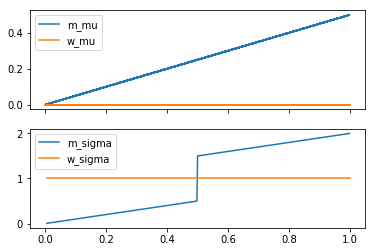

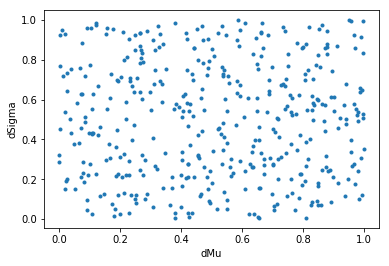

In [68]:
results= simResults()
print(results.head())

plotSamples(results)

In [40]:
start= -10
stop= 10
step = .001
nSteps= (stop-start)/step

x= np.linspace(start, stop, nSteps)
frame= pd.DataFrame({'theta':x})
frame.reset_index(inplace=True)

C:\Users\edwardsd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


# Start

In [41]:
frame= thetaIndex(-10,.001)

C:\Users\edwardsd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


```
m_mu,m_sigma= 0.5, 1.5
w_mu,w_sigma= 0, 1
```

In [42]:
baseMu= 0
baseSigma= 1

In [43]:
w_mu= baseMu
w_sigma= baseSigma

In [44]:
random.seed(42)
dMu= random.random()
dSigma= random.random()
dSigma_pctChange= math.copysign(abs(dSigma-0.5),dSigma-0.5)

In [45]:
m_mu= w_mu+dMu
m_sigma= w_sigma*(1+dSigma_pctChange)

In [46]:
print(m_mu,m_sigma)
print(w_mu,w_sigma)

0.6394267984578837 0.5250107552226669
0 1


In [47]:
baseMu= 0
baseSigma= 1
w_mu= baseMu
w_sigma= baseSigma

# Start Simulation Here

In [58]:
selectedResult= results.iloc[random.randint(0,len(results))]

In [61]:
w_mu= selectedResult.w_mu
w_sigma= selectedResult.w_sigma
m_mu= selectedResult.m_mu
m_sigma= selectedResult.m_sigma

In [62]:
pdfM= pdf(m_mu,m_sigma)
pdfW= pdf(w_mu,w_sigma)

In [63]:
frame['m']= frame.applymap(pdfM)[['theta']]
frame['w']= frame.applymap(pdfW)[['theta']]

In [64]:
m= frame['m']
w= frame['w']

In [65]:
m_total= frame['m'].sum()*step
w_total= frame['w'].sum()*step

In [66]:
m_wing= (1-m_total)/2
w_wing= (1-w_total)/2

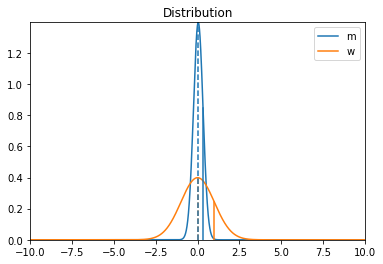

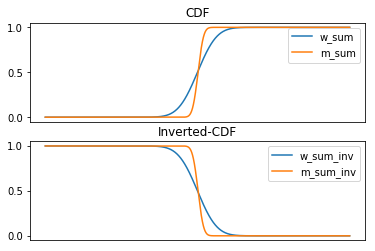

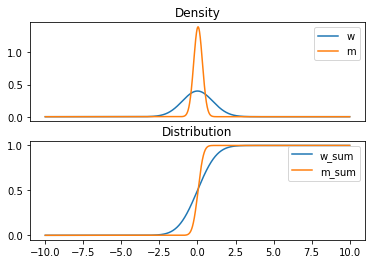

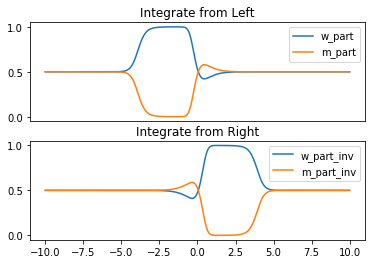

In [67]:
plot1(), plot2(), plot3(), plot4()
pass